In [2]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2629 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9672
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9752
0.0912744402885437
0.9751999974250793


In [3]:
model.predict(x_test)

array([[4.2230308e-10, 5.7584916e-08, 1.3102586e-05, ..., 9.9996626e-01,
        1.4884056e-08, 4.0109761e-08],
       [3.5646064e-10, 2.7201257e-03, 9.9727398e-01, ..., 2.6569160e-09,
        5.2836089e-08, 1.5262769e-13],
       [5.1576166e-08, 9.9989367e-01, 4.5588899e-05, ..., 4.1486452e-05,
        4.5764737e-06, 1.9642165e-07],
       ...,
       [4.4731156e-08, 1.5756040e-06, 7.1645246e-07, ..., 6.6390305e-05,
        6.3320414e-07, 9.7710821e-05],
       [1.0738214e-06, 1.8540987e-06, 1.6328320e-06, ..., 2.5844221e-07,
        1.4094524e-04, 1.0166267e-07],
       [1.4174427e-06, 1.4905446e-06, 2.2734962e-06, ..., 2.5031245e-08,
        4.0590740e-07, 1.7950436e-09]], dtype=float32)

In [4]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [10]:
import numpy as np

print(np.argmax(predictions[2]))

1


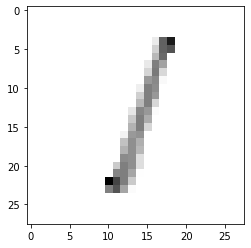

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2],cmap=plt.cm.binary)
plt.show()